#### Case 2: Isobaric evaporation of liquid nitrogen in a 6.75 L vertically orientated cylindrical tank experiments.

This notebook sets up the isobaric evaporation of liquid nitrogen ($LN_2$) in a 6.75 L storage tank. A low liquid filling, low heat ingress scenario from Seo and Jeong (2009) is considered. This tank is representative of lab-scale tanks used for cryogen evaporation experiments that measure boil-off rates and thermal stratification.

In [1]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

#### Setup tank and cryogen properties

In [2]:
# LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 0.201 # Internal diameter / m
d_o = 0.204   # External diameter / m
T_air = 298.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.026 # W/m2/K
U_V = 0.026 # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 0 # W, 

# Vertically orientated cylindrical tank volume
V_tank = 4*(np.pi*(0.201/2)**3)/3 #m^3
#V_tank = 6.75e-3

# Initial liquid filling / Dimensionless
LF = 0.3

# Specify tank operating pressure
P = 100000 # Pa

Geo_v1 = "cylindrical"
Geo_v2 = "spherical"

Geo_l1 = "cylindrical"
Geo_l2 = "spherical"

# Initialize large-scale tank
small_tank1 = Tank(d_i, d_o, V_tank, Geo_v1, Geo_l1,LF)
small_tank1.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b, eta_w = 0.963)

small_tank2 = Tank(d_i, d_o, V_tank, Geo_v2,Geo_l2,LF)
small_tank2.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b, eta_w = 0.963)

# Initialise cryogen
nitrogen1 = Cryogen(name = "nitrogen")
nitrogen1.set_coolprops(P)

nitrogen2 = Cryogen(name="nitrogen")
nitrogen2.set_coolprops(P)

# Set cryogen
small_tank1.cryogen = nitrogen1
small_tank2.cryogen = nitrogen2

# Calculate initial evaporation rate
print("The initial evaporation rate of " + nitrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))
print("The initial evaporation rate of " + nitrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

The initial evaporation rate of nitrogen is 8.7e-03 kg/h
The initial evaporation rate of nitrogen is 1.3e-02 kg/h


Calculate initial evaporation rate and transient period

In [3]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + nitrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank1.tau)

# Minimum number of hours to achieve steady state 
tau_h1 = (np.floor(small_tank1.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h1 )

# Calculate boil-off rate
BOR1 = (small_tank1.b_l_dot * 24 * 3600) / (small_tank1.V * small_tank1.LF * small_tank1.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR1 * 100))

# Calculate initial evaporation rate
print("\nThe initial evaporation rate of " + nitrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank2.tau)

# Minimum number of hours to achieve steady state 
tau_h2 = (np.floor(small_tank2.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h2 )

# Calculate boil-off rate
BOR2 = (small_tank2.b_l_dot * 24 * 3600) / (small_tank2.V * small_tank2.LF * small_tank2.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR2 * 100))

The initial evaporation rate of nitrogen is 8.7e-03 kg/h
Transient period = 5625.931 s 
Simulation time: 2 h
BOR = 20.243 %

The initial evaporation rate of nitrogen is 1.3e-02 kg/h
Transient period = 4653.601 s 
Simulation time: 2 h
BOR = 30.894 %


#### Simulation setup and execution

[ 0.00000000e+00 -4.18057198e-01 -2.02754548e-01 -1.30864105e-01
 -9.47843445e-02 -7.30086322e-02 -5.83708004e-02 -4.77999666e-02
 -3.97602512e-02 -3.33976185e-02 -2.81986919e-02 -2.38356840e-02
 -2.00888490e-02 -1.68046988e-02 -1.38720875e-02 -1.12078130e-02
 -8.74755710e-03 -6.43994742e-03 -4.24250536e-03 -2.11875574e-03
 -3.60540249e-05  2.03615856e-03  4.12787683e-03  6.26999300e-03
  8.49584957e-03  1.08430518e-02  0.00000000e+00]   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]   [0.00267333 0.00191451 0.00158372 0.00139003 0.00126051 0.00116709
 0.00109636 0.00104105 0.00099681 0.00096087 0.00093138 0.00090707
 0.000887   0.00087051 0.00085712 0.00084645 0.00083822 0.00083226
 0.0008284  0.00082658 0.00082674 0.0008289  0.0008331  0.00083944
 0.00084805]   [-0.42073053 -0.20466906 -0.13244782 -0.09617438 -0.07426914 -0.05953789
 -0.04889633 -0.04080131 -0.03439443 -0.02

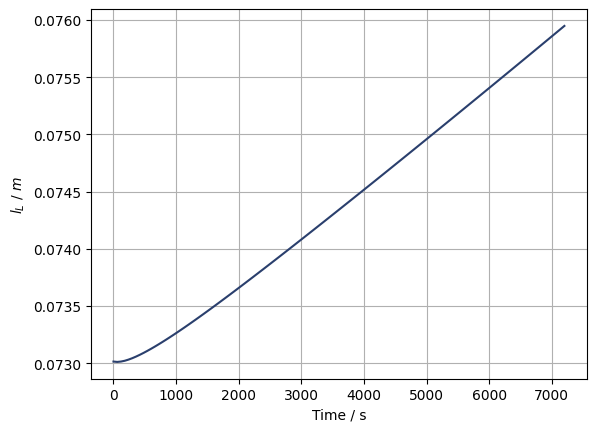

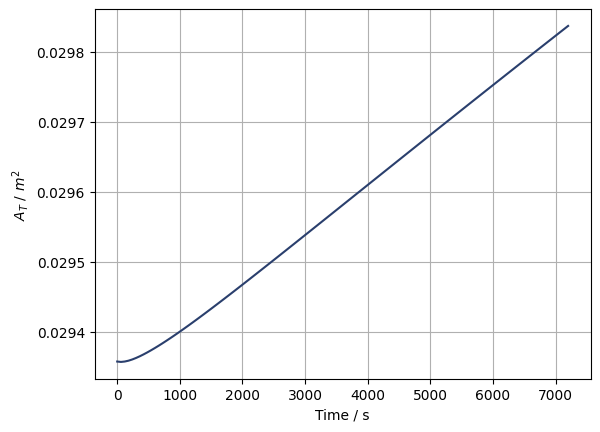

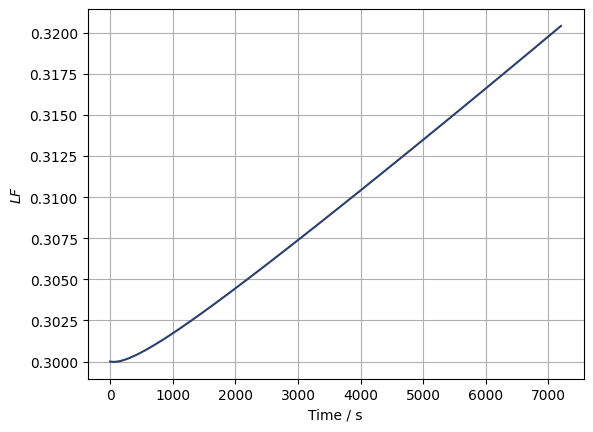

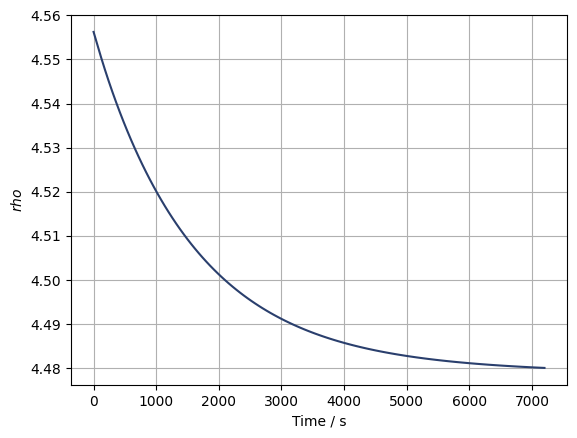

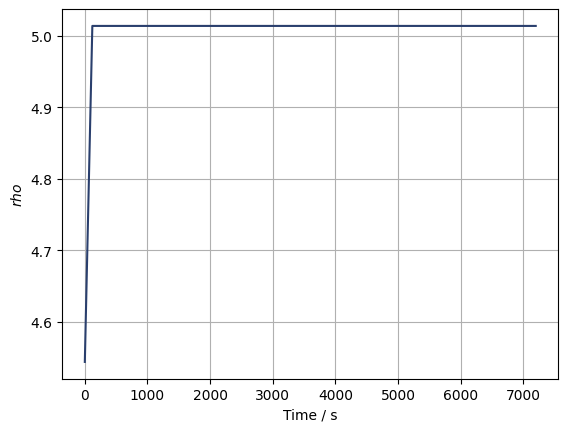

In [4]:
# Define vertical spacing
dz = 0.005

# Calculate number of nodes
n_z = 1 + int(np.round(small_tank1.l_V/dz, 0))

# Define dimensionless computational grid
small_tank1.z_grid = np.linspace(0, 1, n_z)

# Insulated roof
small_tank1.U_roof = 0

# Define evaporation time as twice as the transient period
evap_time = 3600 *tau_h1

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank1.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank1.plot_interval = evap_time/6

# Simulate the evaporation
small_tank1.evaporate(evap_time)

# Define vertical spacing
dz = 0.005

# Calculate number of nodes
n_z = 1 + int(np.round(small_tank2.l_V/dz, 0))

# Define dimensionless computational grid
small_tank2.z_grid = np.linspace(0, 1, n_z)

# Insulated roof
small_tank2.U_roof = 0

# Define evaporation time as twice as the transient period
evap_time = 3600 *tau_h2

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank2.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank2.plot_interval = evap_time/6

# Simulate the evaporation
small_tank2.evaporate(evap_time)

#small_tank1.plot_l_L()
small_tank2.plot_l_L()

small_tank2.plot_A_T()

#small_tank1.plot_LF()
small_tank2.plot_LF()

small_tank1.plot_rho_V_avg()
small_tank2.plot_rho_V_avg()

#### Visualisation of results

#### Vapour temperature

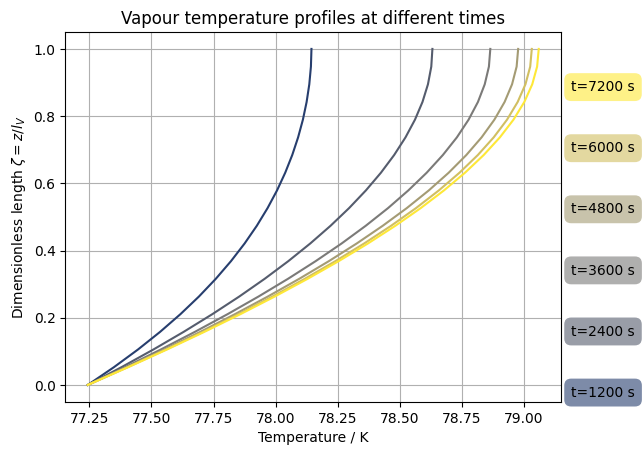

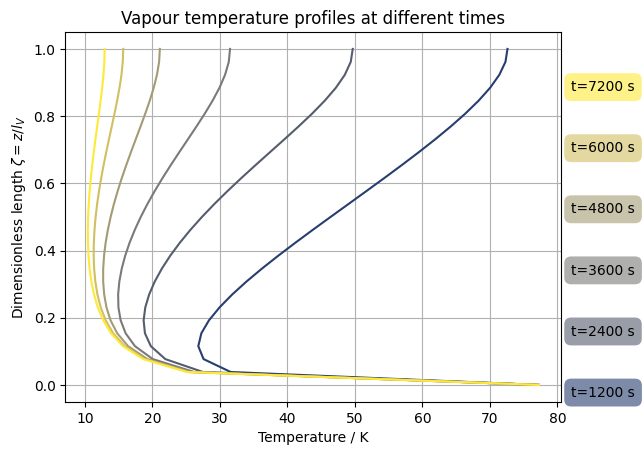

In [5]:
# Visualise the plot
small_tank1.plot_tv()
small_tank2.plot_tv()

Visualise liquid and vapour heat ingresses, $\dot{Q}_{\text{L}}$ and  $\dot{Q}_{\text{V}}$.

The plot also shows the vapour to liquid heat ingress, $\dot{Q}_{VL}$, and  the partition of the vapour heat ingress that is transferred to the interface by the wall directly, $\dot{Q}_{\text{V,w}}$

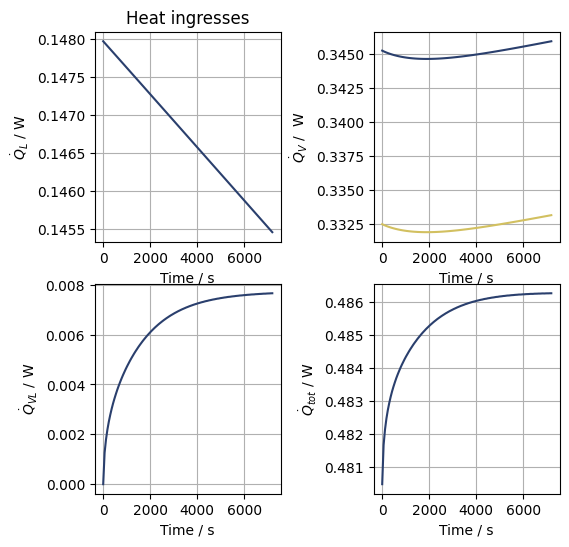

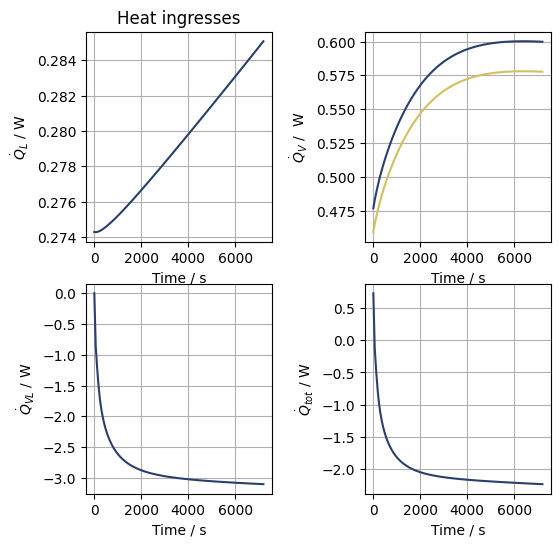

In [6]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_Q(unit="W")
small_tank2.plot_Q(unit="W")

#### Plot liquid volume

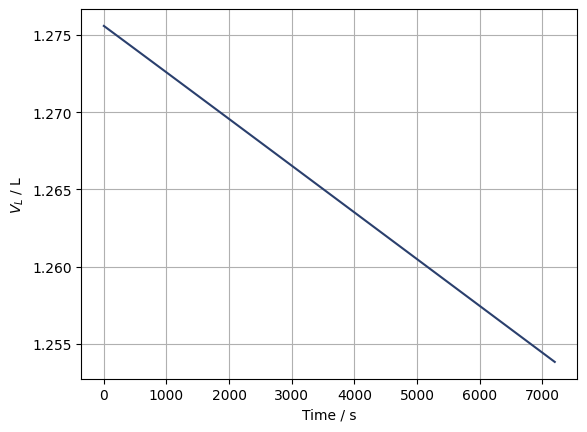

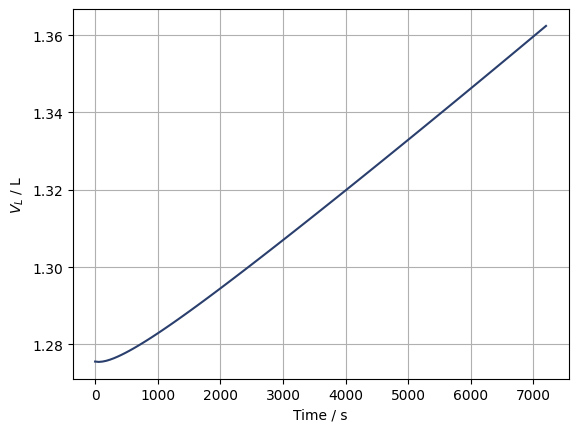

In [7]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_V_L(unit="L")
small_tank2.plot_V_L(unit="L")

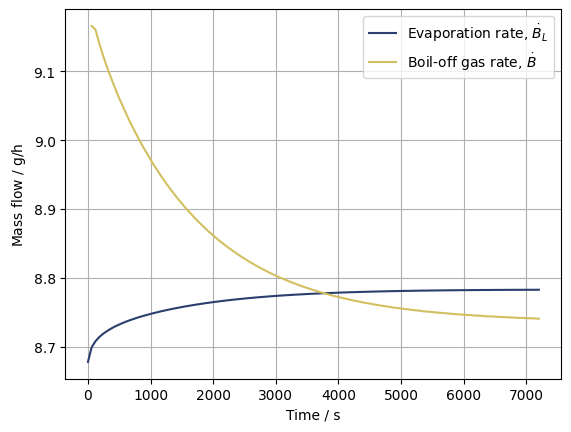

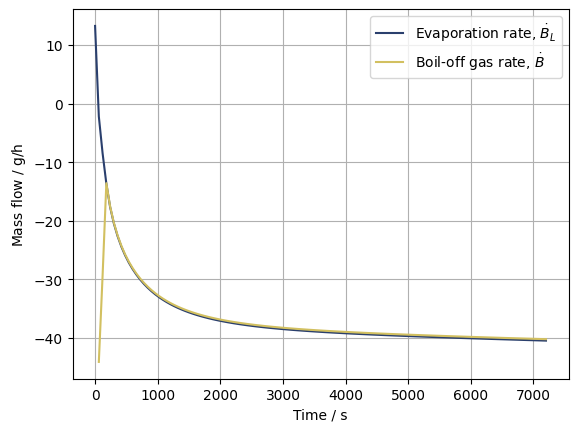

In [8]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_BOG(unit='g/h')
small_tank2.plot_BOG(unit='g/h')

Optional: CSV data export

If evaporation data is intended to be post-processed in another software, it can be exported readily with the help of the Pandas package.

In [9]:
# Import pandas 
import pandas as pd

In [10]:
# Create dataframe from dictionary
df_evap = pd.DataFrame.from_dict(small_tank2.data)
#5580 - min rho
#4980 - max Q_VL
#900 - max A_T
#5580 - max Tv_avg
# Save file to the current working directory
df_evap.to_csv('LN2_small_m3.csv')

# Show the first five columns of the dataframe in console
df_evap.head()

df_evap[df_evap["Tv_avg"] == df_evap["Tv_avg"].max()]

Time   Tv_avg  rho_V_avg  Q_VL       Q_L       Q_V       V_L       B_L  \
0   0.0  77.2435   4.544344   0.0  0.274286  0.476631  0.001276  0.000004   

        BOG  drho_V_avg  dV_L         z       A_T   LF      Q_Vw  
0  0.000004         0.0   0.0  0.073015  0.029358  0.3  0.458996

#### References




M. Seo, S. Jeong, Analysis of self-pressurization phenomenon of cryogenic fluid storage tank with thermal diffusion model, Cryogenics, 50(9) (2010) 549-555.